In [1]:
import numpy as np
import matplotlib.pyplot as plt
from environment import Environment
from optimizer import OGD, BGD_1, BGD_2, BGD_d, BGD_k

In [2]:
#constants 

T = 10000 # Time round
lr = 0.01 # Learning rate
d = 10 # Dimension
pr = 0.1 # Purturbation scale


In [3]:
# Define enviornments & algorithms

env = Environment(d,T)
bgd_1 = BGD_1(lr=lr, pr=pr, d=d)
bgd_2 = BGD_2(lr=lr, pr=pr, d=d)
bgd_d = BGD_d(lr=lr, pr=pr, d=d)

In [4]:
# Loss & Regret

bgd1_loss = np.zeros(T)
bgd1_regret = np.zeros(T)

bgd2_loss = np.zeros(T)
bgd2_regret = np.zeros(T)

bgdd_loss = np.zeros(T)
bgdd_regret = np.zeros(T)

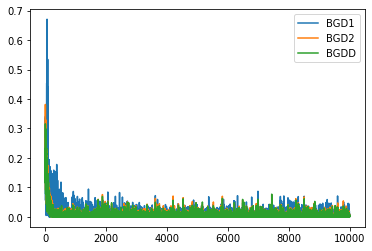

In [5]:
# Learning

for t in range(T):

    x_bgd1 = bgd_1.choose(env,t)
    x1_bgd2, x2_bgd2 = bgd_2.choose(env,t)
    xds = bgd_d.choose(env,t)
    
    bgd1_loss[t]=env.get_loss_val(t,x_bgd1)

    bgd2_loss[t]=0.5*(env.get_loss_val(t,x1_bgd2)+env.get_loss_val(t,x2_bgd2))

    loss_d = 0
    for i in range(d+1):
        loss_d += env.get_loss_val(t,xds[i])
    loss_d = loss_d/(d+1)
    bgdd_loss[t]=loss_d

    
plt.plot(bgd1_loss, label='BGD1')
plt.plot(bgd2_loss, label='BGD2')
plt.plot(bgdd_loss, label='BGDD')

plt.legend()
plt.savefig('loss.png')


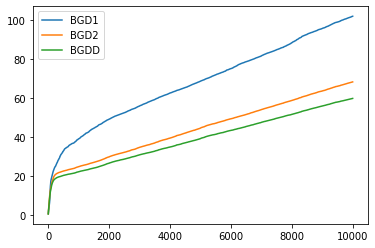

In [6]:
# Regret

for t in range(T):
    bgd1_regret[t]=(bgd1_loss[t]+bgd1_regret[t-1])
    bgd2_regret[t]=(bgd2_loss[t]+bgd2_regret[t-1])
    bgdd_regret[t]=(bgdd_loss[t]+bgdd_regret[t-1])


plt.plot(bgd1_regret[1:T+1], label='BGD1')
plt.plot(bgd2_regret[1:T+1], label='BGD2')
plt.plot(bgdd_regret[1:T+1], label='BGDD')

plt.legend()
plt.savefig('regret.png')